# ENG 10: Lab 2 (Multiple Variables)
In this lab we will explore functions of multiple variables, partial derivatives and vectors.

In [3]:
# load required packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# extra plotting tools (for 3D plots)
from mpl_toolkits.mplot3d import axes3d

# enable interactive plots
from ipywidgets.widgets import interact, fixed, FloatSlider

# ensure code is compatible with both Python 2.7 and 3.5
from __future__ import print_function, division

## 0) Review
Let's briefly review some of the basics of Python:
- starting Jupyter Notebook
- opening a notebook file
- cells:
    - code cells: for writing and executing Python code
    - Markdown cells: for writing text and answering questions
- variables
- functions
- plotting

## 1) Vectors
We've provide some code below for plotting vectors (``plot_vector``) and showing the parallelogram law of vector addition (``plot_vector_sum``). We'll use the code functions to try out some of the properties of vectors that we discussed in class.

In [4]:
# RUN THIS CODE CELL AS-IS
#
# helper functions to plot vectors

# plot a single vector
def plot_vector(vec, name='vector', color='black'):
    x = vec[0]
    y = vec[1]
    
    # show the vector as a line
    x_line = [0, x]
    y_line = [0, y]
    plt.plot(x_line, y_line, color=color, label=name)
    
    # show the end-point of the vector
    plt.plot(x, y, color='k', marker='o', markersize=10)
    
    # set the axis range
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    
    # add a legend
    plt.legend()
    
    
# plot the sum of two vectors
def plot_vector_sum(u, v):   
    # plot individual vectors
    plot_vector(u, name='u', color='b')
    plot_vector(v, name='v', color='g')
    
    # dashed u
    u_dashed_x = [v[0], v[0] + u[0]]
    u_dashed_y = [v[1], v[1] + u[1]]
    plt.plot(u_dashed_x, u_dashed_y, 'b--', label='u*')
    
    # dashed v
    v_dashed_x = [u[0], u[0] + v[0]]
    v_dashed_y = [u[1], u[1] + v[1]]
    plt.plot(v_dashed_x, v_dashed_y, 'g--', label='v*')
    
    # plot the sum: u + v
    plot_vector(u + v, name='u + v', color='r')
    
    # add a legend outside the plot
    plt.legend(bbox_to_anchor=(1.3, 0.8))

    # change the axis range
    plt.xlim([-15, 15])
    plt.ylim([-15, 15])
    
    plt.show()

## 1.1) Plot vectors
First we will plot individual vectors.

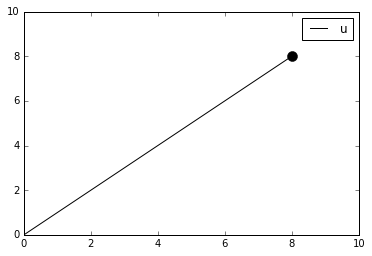

In [6]:
# create a vector
u = np.asarray([8, 8])

# plot the vector
plot_vector(u, name='u')

**Task:** Try out multiple vectors in order to get a sense of how the numbers translate to the visualization.

## 1.2) Plot sums of vectors
Now we'll try plotting the sum of two vectors (e.g. $u + v$).

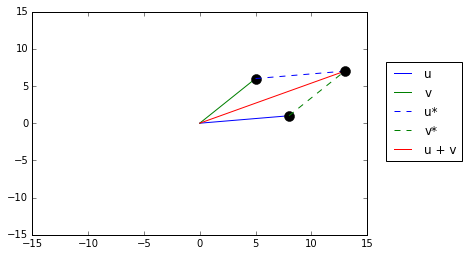

In [7]:
# create the two vectors
u = np.asarray([8, 1])
v = np.asarray([5, 6])

# plot the sum of the two vectors
plot_vector_sum(u, v)

**Task:** Try plotting multiple vectors (i.e. change the vector values and replot a few times).

**Question:** What do the components in the plot mean:
- $u$: vector u (8, 1)
- $v$: vector v (5, 6)
Parallelogram Rule
- $u^*$: vector u compliment 
- $v^*$: vector v compliment

- $u + v$: sum of vectors u and v

## 1.3) Plot subtraction of two vectors
Now that you have a sense of what it means to add two vectors, what do you think happens when you subtract two vectors instead?

**Question:** For example, what would the following vector substraction look like in a plot?

$$
\begin{bmatrix} -2 \\ 8 \end{bmatrix}
-
\begin{bmatrix} 3 \\ 6 \end{bmatrix}
$$

Answer:
$$
\begin{bmatrix} -5 \\ 2 \end{bmatrix}
$$

**Optional challenge:** Using the ``plot_vector_sum`` as a base, try writing a function that plots the substraction of two vectors $u$ and $v$ (i.e. $u - v$).

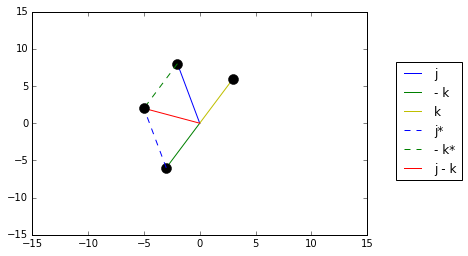

In [46]:
# add your function here


# then use your function to plot the vector subtraction above:
#
#  u - v = [ -2 ]  - [ 3 ]
#          [  8 ]  - [ 6 ]
#
# RUN THIS CODE CELL AS-IS
#
# helper functions to plot vectors

    
    
# plot the subtraction of two vectors
def plot_vector_sub(j, k):   
    # plot individual vectors
    plot_vector(j, name='j', color='b')
    plot_vector(-k, name='- k', color='g')
    plot_vector(k, name='k', color='y')
    
    # dashed u
    j_dashed_x = [-k[0], -k[0]+ j[0] ]
    j_dashed_y = [-k[1], -k[1]+ j[1] ]
    plt.plot(j_dashed_x, j_dashed_y, 'b--', label='j*')
    
    # dashed v
    k_dashed_x = [j[0], j[0]- k[0] ]
    k_dashed_y = [j[1], j[1]- k[1] ]
    plt.plot(k_dashed_x, k_dashed_y, 'g--', label='- k*')
    
    # plot the sum: u - v
    plot_vector(j - k, name='j - k', color='r')
    
    # add a legend outside the plot
    plt.legend(bbox_to_anchor=(1.3, 0.8))

    # change the axis range
    plt.xlim([-15, 15])
    plt.ylim([-15, 15])
    
    plt.show()
    
# create the two vectors
j = np.asarray([-2, 8])
k = np.asarray([3, 6])

# plot the sum of the two vectors
plot_vector_sub(j, k)

## 2) Functions of multiple variables and partial derivatives
- surface plots
- contour plots
- 3D surface plots

Then do 1 or 2 example problems:
- given: f(x, y)
- plot in 3D
- plot slice of f(x, y) in y-direction
- plot slice of f(x, y) in x-direction
- partial derivative in x and y
- plot partial derivative in x and y

## 2) Visualizing beyond 2D
Since we'll be dealing with functions of multiple variables, we need to consider how we will visualize such functions. Although there are many options, let's start by focusing on a 3D surface plot.

## 2.1) Surface plots
In the code below, we'll visualize the elevation of Mt Bruno (aka San Bruno Mountain), which is a mountain in San Mateo County, CA. The idea is to load the elevation data and then visualize it in 3D. Although we're using measured data, the same concepts will apply when working with mathematical functions.

More info on the mountain:
- Google Maps link: https://goo.gl/maps/QWfLdQ8zCay
- Wikipedia page: https://en.wikipedia.org/wiki/San_Bruno_Mountain

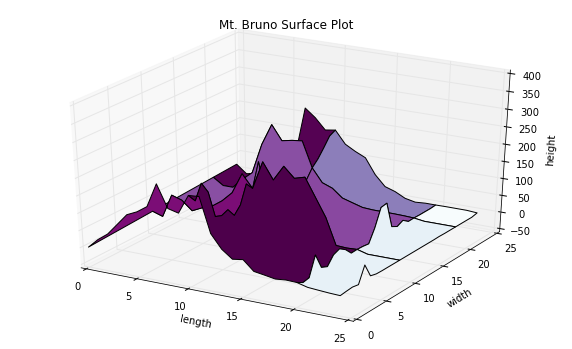

In [25]:
# create vectors that define the axis range we want to plot
x = np.arange(0, 25)
y = np.arange(0, 25)

# convert the vectors for plotting
X, Y = np.meshgrid(x, y)

# initialize the 3D figure
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')

# load the Mt. Bruno data:
# - 25 rows
# - 25 columns
#
Z = np.genfromtxt('mt_bruno_elevation.csv', delimiter=',')

# plot the data as a 3D surface
ax.plot_surface(X, Y, Z, cmap='BuPu')

# add axes labels
ax.set_xlabel('length')
ax.set_ylabel('width')
ax.set_zlabel('height')
ax.set_title('Mt. Bruno Surface Plot')

plt.show()

**Task:** Try out other colormaps (i.e. change ``cmap`` in the code), and pick one that you think is "best".

Examples:
- ``Reds``
- ``BuPu``
- ``cubehelix``

Full list of built-in Matplotlib colormaps: http://matplotlib.org/examples/color/colormaps_reference.html

## 3) Example multivariable function: $f(x, y) = x^2 + \sin (y^2)$
We'll start with a function of two variables ($x$ and $y$):

$$
f(x, y) = x^2 + \sin (y^2)
$$

In this section, we will explore the behavior of the function and its partial derivatives.

## 3.1) Plot slices along the y-axis
We'll begin by  plotting slices of the function along the y-axis. In other words, plot $f(x, y)$ vs. $x$ with a set value of $y$ (e.g. 0.5).

In [50]:
# choose a range of x values to plot
x = np.arange(-3, 3, 0.025)

# pick a y value where we'll "slice" the plot (so it's only 2D)
y = 0.5

# calculate f(x, y)
z = (x^2) + sin(0.25)

# plot f(x, y) vs x
plt.plot(y, z)

# add labels
plt.xlabel('???')
plt.ylabel('???')
plt.title('???')

plt.show()

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

**Task:** Try plotting the function at multiple values of $y$, from -3 to +3.

**Question:** What shape does the function resemble along the y-axis? I.e. as you change the value of $y$, what shape does the plot seem to outline?

**Answer:** (insert your answer here)

## 3.2) Plot slices along the x-axis
Do the same as above, but for fixed values of $x$ (i.e. plot $f(x, y)$ vs. $y$).

In [ ]:
# choose a range of y values to plot
y = np.arange(-3, 3, 0.025)

# pick a x value where we'll "slice" the plot (so it's only 2D)
x = ???

# calculate f(x, y)
z = ???

# plot f(x, y) vs y
plt.plot(???, ???)

# add labels
plt.xlabel('???')
plt.ylabel('???')
plt.title('???')

plt.show()

**Task:** Try plotting the function at multiple values of $x$, from -3 to +3.

**Question:** What shape does the function resemble along the x-axis? I.e. as you change the value of $x$, what shape does the plot seem to outline?

**Answer:** (insert your answer here)

## 3.3) Plot in 3D
From the plots above, you may be able to visualize the shape of the function in 3D. To check, we'll plot the function as a 3D surface. Run the code below **as-is** to see the result.

In [ ]:
# setup the 3D grid of points
x = np.arange(-3, 3, 0.025)
y = np.arange(-3, 3, 0.025)

# restructure the variables for use in the 3D plot
X, Y = np.meshgrid(x, y)

# calculate the function value: z = x^2 + sin(y^2)
Z = (X ** 2) + np.sin(Y ** 2)

# initialize the 3D figure
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')

# plot the surface
ax.plot_surface(???, Y, Z, cmap='???')

# add labels
plt.xlabel('???')
plt.ylabel('???')
plt.zlabel('???')
plt.title('???')

plt.show()

Let's take a step further and plot the 3D surface side-by-side with the slices. Run this code **as-is** and play around with the interactive sliders.

**NOTE:** The code may be slow to refresh, so be patient.

In [ ]:
def plot_surface_problem3(x0, y0):
    
    # resolution
    delta = 0.1
    
    # set up the three subfigures
    fig = plt.figure(figsize=(14, 8))
    ax_3d = fig.add_subplot(1, 2, 1, projection='3d')
    ax_x_slice = fig.add_subplot(2, 2, 2)
    ax_y_slice = fig.add_subplot(2, 2, 4)
    
    #===========================
    # plot the x-slice (f(x, y) vs. y with x=constant)
    x = x0
    y = np.arange(-3, 3, delta)
    z = (x ** 2) + np.sin(y **2)
    ax_x_slice.plot(y, z, color='red')
    
    # add labels
    ax_x_slice.set_xlabel('y')
    ax_x_slice.set_ylabel('f(x, y)')
    
    #===========================
    # plot the y-slice (f(x, y) vs. x with y=constant)
    x = np.arange(-3, 3, delta)
    y = y0
    z = (x ** 2) + np.sin(y **2)
    ax_y_slice.plot(x, z, color='green', linestyle='--')
    
    # add labels
    ax_y_slice.set_xlabel('x')
    ax_y_slice.set_ylabel('f(x, y)')
    
    #===========================
    # plot the 3D surface
    x = np.arange(-3, 3, delta)
    y = np.arange(-3, 3, delta)
    X, Y = np.meshgrid(x, y)
    Z = (X ** 2) + np.sin(Y **2)
    ax_3d.plot_surface(X, Y, Z, cmap='Greys',
                      rstride=2,
                      cstride=2,
                      linewidth=0,
                      antialiased=True)
    
    # add labels
    ax_3d.set_xlabel('x')
    ax_3d.set_ylabel('y')
    ax_3d.set_zlabel('f(x, y)')
    
    # add the x-slice onto the 3D plot
    y = np.arange(-3, 3, delta)
    x = np.ones_like(y) * x0
    z = (x ** 2) + np.sin(y **2)
    ax_3d.plot(x, y, z, color='red', linestyle='-', linewidth=2)
    
    # add the y-slice onto the 3D plot
    x = np.arange(-3, 3, delta)
    y = np.ones_like(x) * y0
    z = (x ** 2) + np.sin(y **2)
    ax_3d.plot(x, y, z, color='green', linestyle='--', linewidth=2)
    
    
    # change the viewing angle of the 3D plot
    ax_3d.view_init(55, 65)
    plt.draw()
    
    # show the plot
    plt.show()
    

# try it out
interact(plot_surface_problem3,
         x0=FloatSlider(min=-3, max=3, step=0.1, continuous_update=False),
         y0=FloatSlider(min=-3, max=3, step=0.1, continuous_update=False)
        )

## 3.4) What is the partial derivative with respect to x?
What is the partial derivative of $f(x, y)$ with respect to $x$?

Answer:

$$
\frac{\partial}{\partial x} f(x, y) = ???
$$


## 3.5) Plot the partial derivative with respect to x
Now plot the partial derivative $\partial f/\partial x$ (in 2D).

In [ ]:
# choose a range of x-values
x = np.arange(-3, +3, 0.025)

# calculate df/dx
dfdx = ???

# plot df/dx vs x
plt.plot(???, ???)

# add labels
plt.xlabel('x')
plt.ylabel('???')

plt.show()

**Question:** What does the partial derivative look like? Any comments or observations about its shape (and possible meaning)?

**Answer:** (insert answer here)

## 3.6) What is the partial derivative with respect to y?
What is the partial derivative of $f(x, y)$ with respect to $y$?

Answer:

$$
\frac{\partial}{\partial y} f(x, y) = ???
$$


## 3.5) Plot the partial derivative with respect to y
Now plot the partial derivative $\partial f/\partial y$ (in 2D).

In [ ]:
# choose a range of y-values
y = np.arange(-3, +3, 0.025)

# calculate df/dy
dfdy = ???

# plot df/dy vs y
plt.plot(???, ???)

# add labels
plt.xlabel('???')
plt.ylabel('???')

plt.show()

**Question:** What does the partial derivative look like? Any comments or observations about its shape (and possible meaning)?

**Answer:** (insert answer here)

**Optional challenge:** Try making a 3D plot of the partial derivatives (i.e. plot $\partial f/\partial x$ vs $x$ and $y$, and $\partial f/\partial y$ vs $x$ and $y$).

*Hint*: you can re-use the 3D plot code from Section 3.3.

## 4) Lab Submission
Once you have completed all the code sections and answered the questions, you will submit the lab via email:
1. rename your notebook to include your name (e.g. ``eng10_lab02_firstname_lastname``)
2. save your notebook (File >> Save and Checkpoint)
3. open up your email
4. attach the notebook file (e.g. ``eng10_lab02_firstname_lastname.ipynb``)
5. send the email to your TA (see below)

Email addresses of the TAs:
- Section B00: Tianqi Ren <tren@ucsd.edu>
- Section C00: Kyungah Seo <k1seo@eng.ucsd.edu>

**NOTE**: labs are due 1 week from the assignment date:
- lab assigned Tuesday: lab due by 11:59pm the following Tuesday
- lab assigned Thursday: lab due by 11:59pm the following Thursday